###Import datasets AARDY,Roamright and sevencorners, merge them together and save them in one dataset called reviews

In [137]:
import pandas as pd
df1=pd.read_csv("/content/AARDY (1).csv")
df2=pd.read_csv("/content/Roamright (1).csv")
df3=pd.read_csv("/content/sevencorners (1).csv")
result_df = pd.concat([df1, df2, df3], axis=0)
result_df
result_df.to_csv('reviews.csv', index=False)


###Cleaning : remove 'No review text found' and NAN values

In [138]:
df = pd.read_csv('/content/reviews.csv')
df = df[df['Review'] != 'No review text found']
df

,Name,Review,Number of Stars
0,AARDY,Denise was terrific! I had put in some parame...,5
1,AARDY,"The website is clear, informative and easy to ...",5
2,AARDY,After looking online at AARDY for a travel ins...,5
3,AARDY,The agent was friendly and knowledgeable. She...,5
4,AARDY,She took the time to make sure I understood al...,5
...,...,...,...
6675,sevencorners,Very slow claim process time. Difficult to re...,1
6676,sevencorners,I have submitted payment reimbursements twice ...,1
6677,sevencorners,These guys are just awful. At the beginning of...,1
6678,sevencorners,We have been using Seven corners for a few tim...,5


In [58]:
df.isna().sum()

Name               0
Review             0
Number of Stars    0
dtype: int64

In [59]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###Cleaning : remove stop words

In [139]:

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

df = pd.read_csv('/content/reviews.csv')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        words = text.split()
        words = [word for word in words if word not in stop_words]
        text = ' '.join(words)
        return text
    else:
        return ''

df['Cleaned_Review'] = df['Review'].apply(remove_stopwords)



###Correct spelling with text blob

In [ ]:
from textblob import TextBlob

def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

df['Corrected_Reviews'] = df['Cleaned_Review'].apply(correct_spelling)
df.to_csv('corrected.csv', index=False)

###Tokenization and Lemmatization

In [118]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    if isinstance(text, list):
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text]
        filtered_tokens = [token for token in lemmatized_tokens if token.strip()]
        return ' '.join(filtered_tokens)
    else:
        return ''

df['Tokenized_Lemmatized'] = df['Cleaned_Review'].apply(tokenize_and_lemmatize)



In [89]:
import tensorflow as tf
!pip install transformers
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np

In [140]:
df['sentiment'] = df['Number of Stars'].apply(lambda x: 1 if x >= 3 else 0)

In [132]:
df

,Name,Review,Number of Stars,Cleaned_Review,sentiment
0,AARDY,Denise was terrific! I had put in some parame...,5,denise terrific put parameters website trip ta...,1
1,AARDY,"The website is clear, informative and easy to ...",5,website clear informative easy navigate decide...,1
2,AARDY,After looking online at AARDY for a travel ins...,5,looking online aardy travel insurance policy c...,1
3,AARDY,The agent was friendly and knowledgeable. She...,5,agent friendly knowledgeable looked previous t...,1
4,AARDY,She took the time to make sure I understood al...,5,took time make sure understood options help ma...,1
...,...,...,...,...,...
6675,sevencorners,Very slow claim process time. Difficult to re...,1,slow claim process time difficult reach phone,0
6676,sevencorners,I have submitted payment reimbursements twice ...,1,submitted payment reimbursements twice claim n...,0
6677,sevencorners,These guys are just awful. At the beginning of...,1,guys awful beginning pandemic purchased cancel...,0
6678,sevencorners,We have been using Seven corners for a few tim...,5,using seven corners times always great company...,1


###Visualise the number of positive =1, negative=0 and neutral=2 reviews

<Axes: >

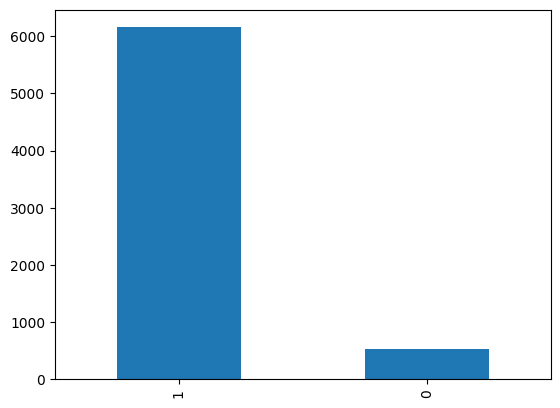

In [33]:
df['sentiment'].value_counts().plot(kind='bar')

###Visualise the number of positive =1, negative=0 and neutral=2 reviews within the same company

<Axes: xlabel='Name'>

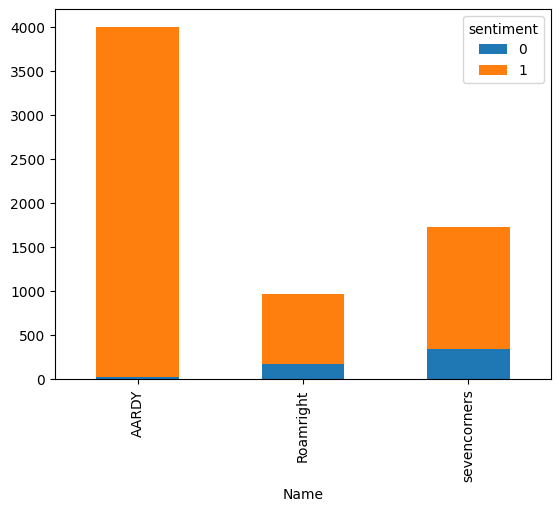

In [34]:
df.groupby(['Name', 'sentiment']).size().unstack().plot(kind='bar', stacked=True)

###Text augmentation

In [35]:
!pip install nlpaug


nlpaug remplace a word with a similar word

In [141]:
import pandas as pd
import nlpaug.augmenter.word as naw

# Assuming your DataFrame is named 'df' and you have a column 'sentiment' and 'Cleaned_Review'
positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]


# Calculate the number of positive reviews
num_positive_reviews = len(positive_reviews)

# Resample negative and neutral reviews to match the number of positive reviews
augmented_negative_reviews = negative_reviews.sample(n=num_positive_reviews, replace=True)

# Use nlpaug to perform text augmentation on the 'Cleaned_Review' column
aug = naw.SynonymAug(aug_src='wordnet')
augmented_negative_reviews['Cleaned_Review'] = augmented_negative_reviews['Cleaned_Review'].apply(lambda x: aug.augment(x))

# Concatenate the original positive reviews with augmented negative and neutral reviews
balanced_df = pd.concat([positive_reviews, augmented_negative_reviews])

# Shuffle the DataFrame to mix the positive, negative, and neutral reviews
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [142]:
#balanced_df.to_csv('reviews.csv', index=False)
balanced_df

,Name,Review,Number of Stars,Cleaned_Review,sentiment
0,sevencorners,They listed themselves as available 24/7. Whe...,1,[listed available telephone collect phone nume...,0
1,sevencorners,"Easy, clear and helpful.The representative was...",5,easy clear helpfulthe representative excellent,1
2,AARDY,"Very helpful ,on a phone call , to tailor our ...",5,helpful phone call tailor insurance needs inte...,1
3,Roamright,I am rating the service 'poor' because it took...,2,[rating service poor took eight months resolve...,0
4,sevencorners,Its been more than 60’days and my claim is sti...,2,[day claim nevertheless reviewed expect timely...,0
...,...,...,...,...,...
12303,sevencorners,I paid for insurance and when EF Tours cancele...,1,[paid insurance ef circuit invalidate state se...,0
12304,AARDY,Roy was very knowledgeable and vey pleasant to...,5,roy knowledgeable vey pleasant work highly rec...,1
12305,Roamright,I'm a long time customer. Everything seems gr...,2,[im long time customer everything seems great ...,0
12306,Roamright,It's about getting a quick resolution... This ...,2,[getting straightaway resolution first time us...,0


Check the number of postive and negative classes

<Axes: >

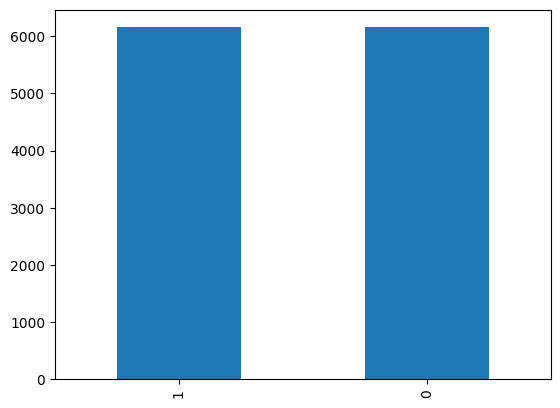

In [75]:
balanced_df['sentiment'].value_counts().plot(kind='bar')

#Sentiment Analysis

###1/ Using LSTM

In [100]:
!pip install keras

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, SpatialDropout1D, Dropout, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           160000    
                                                                 
 spatial_dropout1d_4 (Spati  (None, 100, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_4 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 176651 (690.04 KB)
Trainable params: 176651 (690.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________

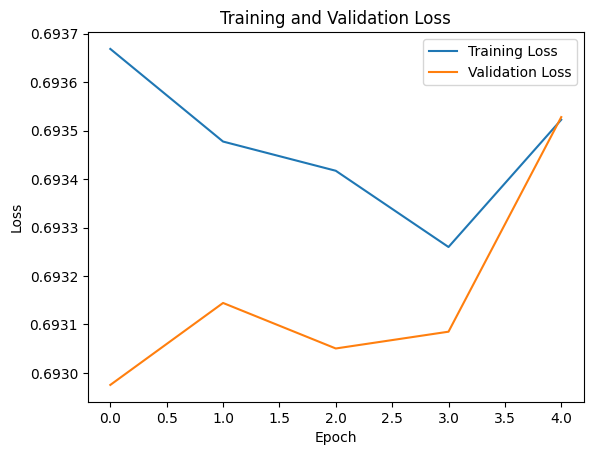

77/77 [==============================] - 3s 35ms/step
Accuracy: 0.5113728675873274

Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68      1259
           1       0.00      0.00      0.00      1203

    accuracy                           0.51      2462
   macro avg       0.26      0.50      0.34      2462
weighted avg       0.26      0.51      0.35      2462



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
X_train, X_test, y_train, y_test = train_test_split(balanced_df['Cleaned_Review'], balanced_df['sentiment'], test_size=0.2, random_state=42)

max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#LSTM model
embedding_vector_length = 32
vocab_size = max_words
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_len))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, y_train_encoded, validation_split=0.2, epochs=5, batch_size=32)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred_probs = model.predict(X_test_pad)
y_pred = [np.argmax(probs) for probs in y_pred_probs]

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           160000    
                                                                 
 spatial_dropout1d_5 (Spati  (None, 100, 32)           0         
 alDropout1D)                                                    
                                                                 
 lstm_5 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 176651 (690.04 KB)
Trainable params: 176651 (690.04 KB)
Non-trainable params: 0 (0.00 Byte)
______________

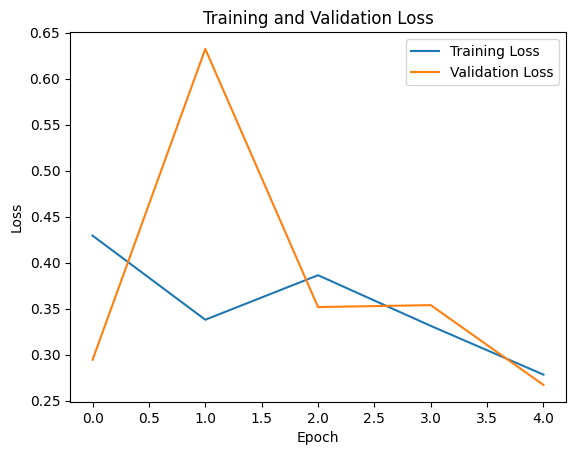

77/77 [==============================] - 3s 35ms/step
Accuracy: 0.5113728675873274

Classification Report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68      1259
           1       0.00      0.00      0.00      1203

    accuracy                           0.51      2462
   macro avg       0.26      0.50      0.34      2462
weighted avg       0.26      0.51      0.35      2462



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
X_train, X_test, y_train, y_test = train_test_split(balanced_df['Review'], balanced_df['sentiment'], test_size=0.2, random_state=42)

max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#LSTM model
embedding_vector_length = 32
vocab_size = max_words
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_len))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_pad, y_train_encoded, validation_split=0.2, epochs=5, batch_size=32)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred_probs = model.predict(X_test_pad)
y_pred = [np.argmax(probs) for probs in y_pred_probs]

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))

In [153]:
new_review = "i recommand this insurance"

new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_pad = pad_sequences(new_review_seq, maxlen=max_len, padding='post')
new_review_probs = model.predict(new_review_pad)
predicted_sentiment = label_encoder.classes_[np.argmax(new_review_probs)]

print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 41ms/step
Predicted Sentiment: 0


As we see LSTM was not able to predict correctly if the review is postive or negative(1 or 0) In this case the review is positive but it predicted it as negative(=0).

###Using BERT pretrained model

In [ ]:
reviews = balanced_df['Review'].values.tolist()
labels = balanced_df['sentiment'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer([training_sentences[0]], truncation=True,

                            padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

{'input_ids': [[101, 7078, 6659, 999, 1045, 6406, 1037, 4366, 2067, 2012, 1996, 2927, 1997, 2285, 2007, 2035, 1996, 4871, 2734, 1010, 2130, 4149, 1996, 1000, 17542, 2005, 2151, 3114, 1000, 1010, 2144, 2057, 2134, 1005, 1056, 2113, 2054, 2001, 6230, 2007, 1996, 6090, 3207, 7712, 1012, 1045, 4149, 1996, 2198, 13849, 4034, 3165, 2933, 1012, 1045, 2170, 5560, 2382, 10259, 2015, 2044, 2000, 2156, 1996, 3570, 1998, 2027, 17806, 1998, 2056, 2008, 2027, 2020, 2941, 2770, 2006, 1037, 4720, 10259, 2735, 2105, 1010, 2061, 1045, 2435, 2068, 1037, 2210, 3389, 4576, 1012, 2021, 2059, 1010, 1045, 2131, 2019, 10373, 1999, 2233, 2055, 11303, 3176, 4871, 1010, 2061, 1045, 2741, 2068, 1999, 2153, 1012, 1045, 2170, 2000, 2156, 2129, 2146, 2009, 2052, 2202, 1010, 2027, 2056, 2019, 3176, 2382, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:

train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)

# Compile the model with an explicit loss function
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=2,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/2
720/720 [==============================] - 711s 957ms/step - loss: 0.1471 - accuracy: 0.9420 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 2/2
720/720 [==============================] - 697s 969ms/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.0211 - val_accuracy: 0.9930


In [ ]:
model.save_pretrained("./sentiment")

In [ ]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./sentiment")

Some layers from the model checkpoint at ./sentiment were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at ./sentiment and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_sentence = "i waste my money"


predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]


tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['0','1']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

1/1 [==============================] - 0s 43ms/step
0


In [ ]:
test_sentence = "this is heplful"


predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]


tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['0','1']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

1/1 [==============================] - 0s 29ms/step
1


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from IPython.display import display, HTML


def predict_sentiment(user_input):
    predict_input = tokenizer.encode(user_input, truncation=True, padding=True, return_tensors="tf")
    tf_output = loaded_model.predict(predict_input)[0]
    tf_prediction = tf.nn.softmax(tf_output, axis=1)
    labels = ['0', '1']
    label = tf.argmax(tf_prediction, axis=1)
    prediction = labels[label[0]]
    return prediction

def interactive_interface():
    display(HTML("<h1>Sentiment Analysis</h1>"))
    user_input = input("Enter your text: ")
    prediction = predict_sentiment(user_input)
    display(HTML(f"<p>You entered: {user_input}</p>"))
    display(HTML(f"<p>Prediction: {prediction}</p>"))

interactive_interface()


Enter your text: i waste my money
1/1 [==============================] - 0s 44ms/step
